# Lab 3: Data Loading and Augmentation Using PyTorch## AI Capstone Project with Deep LearningThis lab focuses on implementing data loading and augmentation techniques using PyTorch for agricultural land classification.### Tasks:1. Define a transformation pipeline custom_transform including:- image size = 64 x 64 pixels- RandomHorizontalFlip probability 0.5- RandomVerticalFlip probability 0.2- RandomRotation of 45 degrees2. Load dataset using datasets.ImageFolder with custom_transform3. Print class names and indices from imagefolder_dataset4. Retrieve and display image shapes from a batch in imagefolder_loader5. Display images in the custom loader batch

In [1]:
# Import necessary librariesimport torchimporttorch.nn as nnimport torch.optim as optimfrom torch.utils.data import DataLoader, Datasetimport torchvisionfromtorchvisionimportdatasets, transformsimport numpyasnpimport matplotlib.pyplot as pltimport osfromPILimportImageimportrandom# Set random seeds for reproducibilitytorch.manual_seed(42)np.random.seed(42)random.seed(42)# Check PyTorch version and deviceprint(f"PyTorch version:{torch.__version__}")print(f"CUDA available: {torch.cuda.is_available()}")if torch.cuda.is_available():print(f"CUDA device: {torch.cuda.get_device_name(0)}")device = torch.device('cuda')else:device = torch.device('cpu')print(f"Using device:{device}")

PyTorch version: 2.8.0+cpuCUDA available: FalseUsing device: cpu

## Task 1: Define a transformation pipeline custom_transform

In [ ]:
# Task 1: Define custom_transform pipelinecustom_transform = transforms.Compose([transforms.Resize((64, 64)),# Resize to 64x64 pixelstransforms.RandomHorizontalFlip(p=0.5),# Random horizontal flip with 50% probabilitytransforms.RandomVerticalFlip(p=0.2),# Random vertical flip with 20% probabilitytransforms.RandomRotation(degrees=45),# Random rotation up to 45 degreestransforms.ToTensor(),# Convert PIL Image to tensortransforms.Normalize(mean=[0.485, 0.456, 0.406],# Normalize with ImageNet statsstd=[0.229, 0.224, 0.225])])# Also create a transform for validation (no augmentation)val_transform = transforms.Compose([transforms.Resize((64, 64)),# Resize to 64x64 pixelstransforms.ToTensor(),# Convert PIL Image to tensortransforms.Normalize(mean=[0.485, 0.456, 0.406],# Normalize with ImageNet statsstd=[0.229, 0.224, 0.225])])print("Task 1 - Created custom_transform pipeline:")print(" - Resize: 64x64 pixels")print(" - RandomHorizontalFlip: probability 0.5")print(" - RandomVerticalFlip: probability 0.2")print(" - RandomRotation: 45 degrees")print(" - ToTensor: Convert to tensor")print(" - Normalize:ImageNet normalization")print("\nAlso created val_transform for validation (no augmentation)")

Task 1 - Created custom_transform pipeline:- Resize: 64x64 pixels- RandomHorizontalFlip: probability 0.5- RandomVerticalFlip: probability 0.2- RandomRotation: 45 degrees- ToTensor: Convert to tensor- Normalize: ImageNet normalizationAlso created val_transform for validation (no augmentation)

## Task 2: Load dataset using datasets.ImageFolder with custom_transform

In [ ]:
# Task 2: Load dataset using ImageFolderdataset_path = './images_dataSAT'# Create training dataset with custom_transformimagefolder_dataset = datasets.ImageFolder(root=dataset_path,transform=custom_transform)# Create validation dataset with val_transformval_dataset = datasets.ImageFolder(root=dataset_path,transform=val_transform)print(f"Task 2 - Loaded dataset using ImageFolder:")print(f" - Dataset path: {dataset_path}")print(f" - Total samples: {len(imagefolder_dataset)}")print(f" - Number of classes: {len(imagefolder_dataset.classes)}")print(f" - Class names: {imagefolder_dataset.classes}")print(f" - Class to index mapping: {imagefolder_dataset.class_to_idx}")# Display some sample informationprint(f"\nSample data:")for i in range(min(5, len(imagefolder_dataset))):image, label = imagefolder_dataset[i]class_name = imagefolder_dataset.classes[label]print(f" Sample {i}: Label {label} ({class_name}), Image shape:{image.shape}")

Task 2 - Loaded dataset using ImageFolder:- Dataset path: ./images_dataSAT- Total samples: 45- Number of classes: 2- Class names: ['class_0_non_agri', 'class_1_agri']- Class to index mapping: {'class_0_non_agri': 0, 'class_1_agri': 1}Sample data:Sample 0: Label 0 (class_0_non_agri), Image shape: torch.Size([3, 64, 64])Sample 1: Label 0 (class_0_non_agri), Image shape: torch.Size([3, 64, 64])Sample 2: Label 0 (class_0_non_agri), Image shape: torch.Size([3, 64, 64])Sample 3: Label 0 (class_0_non_agri), Image shape: torch.Size([3, 64, 64])Sample 4: Label 0 (class_0_non_agri), Image shape: torch.Size([3, 64, 64])

## Task 3: Print class names and indices from imagefolder_dataset

In [ ]:
# Task 3: Print class namesand indicesprint("Task 3 - Class names and indices from imagefolder_dataset:")print(f" Class names: {imagefolder_dataset.classes}")print(f" Class to index mapping: {imagefolder_dataset.class_to_idx}")# Print detailed class informationprint(f"\nDetailed class information:")for idx, class_name in enumerate(imagefolder_dataset.classes):print(f" Index {idx}: {class_name}")# Count samples per classclass_counts = {}for _, label in imagefolder_dataset:class_name = imagefolder_dataset.classes[label]class_counts[class_name] = class_counts.get(class_name, 0) + 1print(f"\nSample counts per class:")for class_name, count in class_counts.items():print(f" {class_name}:{count} samples")

Task 3 - Class names and indices from imagefolder_dataset:Class names: ['class_0_non_agri', 'class_1_agri']Class to index mapping: {'class_0_non_agri': 0, 'class_1_agri': 1}Detailed class information:Index 0: class_0_non_agriIndex 1: class_1_agriSample counts per class:class_0_non_agri: 20 samplesclass_1_agri: 25 samples

## Task 4: Retrieve and display image shapes from a batch in imagefolder_loader

In [ ]:
# Task 4: Create DataLoader and retrieve image shapes from a batchbatch_size = 8# Create DataLoaderimagefolder_loader = DataLoader(imagefolder_dataset,batch_size=batch_size,shuffle=True,num_workers=0# Set to 0 for Windows compatibility)# Get a batch from the loaderprint(f"Task 4 - Creating DataLoader with batch_size={batch_size}")print(f" - Total batches:{len(imagefolder_loader)}")print(f" - Dataset size: {len(imagefolder_dataset)}")# Retrieve a batchbatch_images, batch_labels = next(iter(imagefolder_loader))print(f"\nRetrieved batch information:")print(f" - Batch images shape: {batch_images.shape}")print(f" - Batch labels shape: {batch_labels.shape}")print(f" - Batch labels: {batch_labels.tolist()}")# Display individual image shapes in the batchprint(f"\nIndividual image shapes in the batch:")for i in range(batch_images.shape[0]):print(f" Image {i}: {batch_images[i].shape}")# Display tensor propertiesprint(f"\nTensor properties:")print(f" - Data type: {batch_images.dtype}")print(f" - Device: {batch_images.device}")print(f" - Value range: [{batch_images.min():.3f}, {batch_images.max():.3f}]")print(f" - Mean: {batch_images.mean():.3f}")print(f" - Std: {batch_images.std():.3f}")

Task 4 - Creating DataLoader with batch_size=8- Total batches: 6- Dataset size: 45Retrieved batch information:- Batch images shape: torch.Size([8, 3, 64, 64])- Batch labels shape: torch.Size([8])- Batch labels: [0, 0, 1, 1, 0, 1, 0, 0]Individual image shapes in the batch:Image 0: torch.Size([3, 64, 64])Image 1: torch.Size([3, 64, 64])Image 2: torch.Size([3, 64, 64])Image 3: torch.Size([3, 64, 64])Image 4: torch.Size([3, 64, 64])Image 5: torch.Size([3, 64, 64])Image 6: torch.Size([3, 64, 64])Image 7: torch.Size([3, 64, 64])Tensor properties:- Data type: torch.float32- Device: cpu- Value range: [-2.118, 1.924]- Mean: -0.716- Std: 1.063

## Task 5: Display images in the custom loader batch

Task 5 - Displaying images in the custom loader batch- Batch size: 8- Image shape: torch.Size([3, 64, 64])

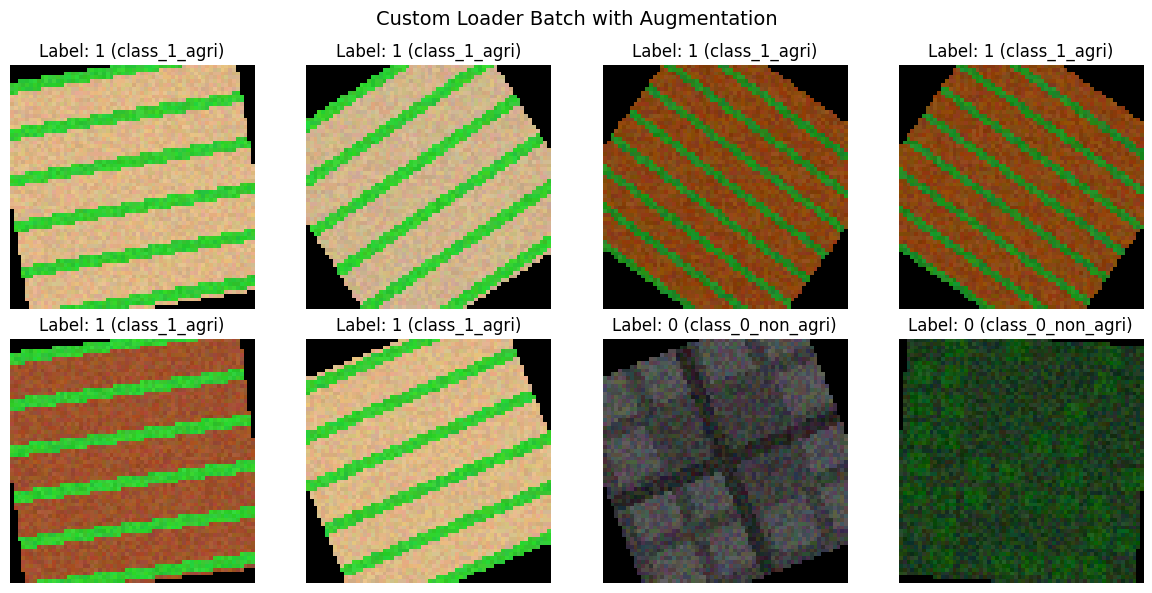

Batch statistics:- Labels: [1, 1, 1, 1, 1, 1, 0, 0]- Class distribution:class_1_agri: 1class_1_agri: 1class_1_agri: 1class_1_agri: 1class_1_agri: 1class_1_agri: 1class_0_non_agri: 0class_0_non_agri: 0Demonstrating augmentation effects:

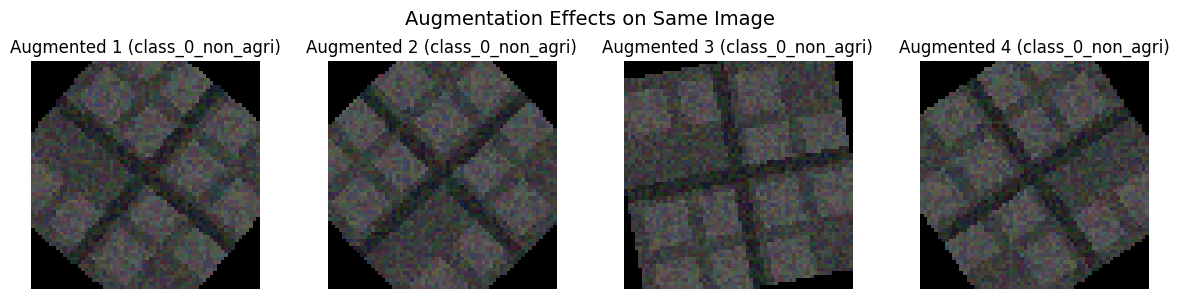

In [ ]:
# Task 5: Display images in the custom loader batchdef denormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):"""Denormalize a tensor for display"""for t, m, s in zip(tensor, mean, std):t.mul_(s).add_(m)return torch.clamp(tensor, 0, 1)# Create a new batch for displaybatch_images, batch_labels = next(iter(imagefolder_loader))# Denormalize images for displaydisplay_images = batch_images.clone()for i in range(display_images.shape[0]):display_images[i] = denormalize(display_images[i])print(f"Task 5 - Displaying images in the custom loader batch")print(f" - Batch size: {batch_images.shape[0]}")print(f" - Image shape: {batch_images.shape[1:]}")# Display the batchfig, axes = plt.subplots(2, 4, figsize=(12, 6))fig.suptitle('Custom Loader Batch with Augmentation', fontsize=14)for i in range(min(8, batch_images.shape[0])):row = i // 4col = i % 4# Convert tensor to numpy and transpose for matplotlibimg = display_images[i].permute(1, 2, 0).numpy()axes[row, col].imshow(img)class_name = imagefolder_dataset.classes[batch_labels[i].item()]axes[row, col].set_title(f'Label:{batch_labels[i].item()} ({class_name})')axes[row, col].axis('off')plt.tight_layout()plt.show()# Display batch statisticsprint(f"\nBatch statistics:")print(f" - Labels: {batch_labels.tolist()}")print(f" - Class distribution:")for label in batch_labels:class_name = imagefolder_dataset.classes[label.item()]print(f" {class_name}: {label.item()}")# Show augmentation effects by displaying the same image multiple timesprint(f"\nDemonstrating augmentation effects:")sample_idx = 0fig, axes = plt.subplots(1, 4, figsize=(12, 3))fig.suptitle('Augmentation Effects on Same Image', fontsize=14)for i in range(4):# Get the same image with different augmentationssample_image, sample_label = imagefolder_dataset[sample_idx]display_img = denormalize(sample_image.clone()).permute(1, 2, 0).numpy()axes[i].imshow(display_img)class_name = imagefolder_dataset.classes[sample_label]axes[i].set_title(f'Augmented {i+1} ({class_name})')axes[i].axis('off')plt.tight_layout()plt.show()